# Consulting Supplier Quality 

## Project Overview

This project evaluates consultant suppliers in Sweden using data from LinkedIn Talent Insights. The analysis focuses on tech talent acquisition in the automotive sector, covering a 12-month period up to October 18, 2023.

## Key Focus Areas

- **Tech Talent Evaluation**: Identification of talents with skills in C/C++, Embedded Systems, Design Engineering, Mechanical Engineering, Software Development, Simulink, MATLAB, Python.
- **Automotive Companies Analysis**: Analysis of data related to OEMs and suppliers in the automotive industry.
- **Talent Acquisition Trends**: Insights into hiring trends, growth, departures, ratio, net changes and more in the companies.

## Data Sources 

- Data consists of 42 Excel files, each from a different consultant company.


## Methodology

1. **Data Aggregation**: Combining data from 42 Excel files.
2. **Data Analysis**: Utilizing Python for preliminary analysis and Power BI for advanced visualizations.
3. **Insights Generation**: Identifying quality of consultant suppliers.




# Summary for Initial Setup and Imports


In [1]:
import pandas as pd
import os
import re
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")

Description:

Library Imports: This section imports essential Python libraries needed for the project.

**pandas**: Used for data manipulation and analysis.

**os**: Provides a way of using operating system dependent functionality.

**re**: Allows for regular expression operations.

**numpy**: Adds support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**matplotlib.pyplot and seaborn**: Used for data visualization.

**scipy.stats**: Provides statistical functions, in this case, ttest_ind for independent sample t-tests.

**sklearn**: Essential for machine learning data processing, model building, and evaluation. Specific imports include train_test_split, LinearRegression, mean_squared_error, and r2_score.
Configuration:

warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl"): Configures the script to ignore specific warnings, particularly those related to openpyxl, which is a library used for reading Excel files.

# Summary for File Path Configuration


In [2]:
path = "C:/Users/zkarimib@volvocars.com/OneDrive - Volvo Cars/Zohreh/Github/Datasets/All Consultant Companies/"
input_path = path + "in" + "/"
output_path = path + "out" + "/"
filter_path = path + "filter" + "/"
print(input_path)

C:/Users/zkarimib@volvocars.com/OneDrive - Volvo Cars/Zohreh/Github/Datasets/All Consultant Companies/in/



#### Base Path Setup
- **`path` Variable**: Defined to store the base directory where all project-related files are located. This directory appears to be a OneDrive folder used for storing the data and outputs of the project.

#### Sub-directory Paths
- **`input_path`**: Designated to hold the path for input files. In this project, these would likely be the Excel files exported from LinkedIn Talent Insights.
- **`output_path`**: Set up for storing output files, which could include processed datasets, results from data analysis, or any exported data files.
- **`filter_path`**: Used for storing files related to filtering criteria or other specific processing needs.

#### Print Statement
- **`print(input_path)`**: This line is used to output the `input_path` to the console, which is a good practice to verify that paths are set up correctly.


# Loading and Preparing Filter Data from Excel Files


**File Listing**: The script begins by listing all files in the input_path directory, helping to verify the available data files for processing.


In [3]:
file_list = os.listdir(input_path)
print(file_list)

['Company 1.xlsx', 'Company 10.xlsx', 'Company 11.xlsx', 'Company 12.xlsx', 'Company 13.xlsx', 'Company 14.xlsx', 'Company 15.xlsx', 'Company 16.xlsx', 'Company 17.xlsx', 'Company 18.xlsx', 'Company 19.xlsx', 'Company 2.xlsx', 'Company 20.xlsx', 'Company 21.xlsx', 'Company 22.xlsx', 'Company 23.xlsx', 'Company 24.xlsx', 'Company 25.xlsx', 'Company 26.xlsx', 'Company 27.xlsx', 'Company 28.xlsx', 'Company 29.xlsx', 'Company 3.xlsx', 'Company 30.xlsx', 'Company 31.xlsx', 'Company 32.xlsx', 'Company 33.xlsx', 'Company 34.xlsx', 'Company 35.xlsx', 'Company 36.xlsx', 'Company 37.xlsx', 'Company 38.xlsx', 'Company 39.xlsx', 'Company 4.xlsx', 'Company 40.xlsx', 'Company 41.xlsx', 'Company 42.xlsx', 'Company 5.xlsx', 'Company 6.xlsx', 'Company 7.xlsx', 'Company 8.xlsx', 'Company 9.xlsx']


**Consultant Companies Data Processing**:
Loads data from the "Consulting Firms.xlsx" file.
Extracts unique consulting companies, applies regex escaping for special characters, and converts them to lowercase for consistent comparison.

In [4]:
consultant_filter_file = pd.read_excel(filter_path + "Consulting Firms.xlsx")
consultant_filter_list = consultant_filter_file['Consulting Company'].unique().tolist()
consultant_filter_list = [re.escape(item) for item in consultant_filter_list]
consultant_filter_list = sorted([element.lower() for element in consultant_filter_list])
#print(consultant_filter_list)

**Automotive Companies Data Processing:**
Similar processing is applied to "Automotive Companies.xlsx", preparing a list of automotive companies.

In [5]:
# Load the Excel file for automative_company
automative_company_filter_file = pd.read_excel(filter_path + "Automotive Companies.xlsx")
automative_company_filter_list = automative_company_filter_file['Company'].tolist()
automative_company_filter_list = [re.escape(item) for item in automative_company_filter_list]
automative_company_filter_list = sorted([element.lower() for element in automative_company_filter_list])
#print(automative_company_filter_list)

**Top 50 Companies Data Processing:**
Loads "Top 50 stora arbestgivare.xlsx" and creates a dictionary mapping companies to their respective ranks.
Converts dictionary keys to lowercase for uniformity.

In [6]:
# Load the Excel file
top_50_company_filter_file = pd.read_excel(filter_path + "Top 50 stora arbestgivare.xlsx")

In [7]:
# Create a dictionary from the 'Top 50 Arbestgivare' column to the 'Rank' column
top_50_company_filter_dict = dict(zip(top_50_company_filter_file['Top 50 Arbestgivare'], top_50_company_filter_file['Rank']))

#print(top_50_company_filter_dict)

In [8]:
top_50_company_filter_dict_lower = {key.lower(): value for key, value in top_50_company_filter_dict.items()}
#print(top_50_company_filter_dict_lower)

In [9]:
def partial_case_insensitive_lookup(company_name, dictionary):
    for key, value in dictionary.items():
        if key.lower() in company_name.lower() or company_name.lower() in key.lower():
            return value
    return None  # return None if no match is found

### Description of Partial Case-Insensitive Lookup Function

#### Purpose
This function is designed to perform a partial, case-insensitive lookup. It checks whether the `company_name` (input string) partially matches any keys in the provided dictionary, regardless of case sensitivity.

#### Parameters
- **`company_name`**: The name of the company to search for within the dictionary keys.
- **`dictionary`**: A dictionary object where keys represent company names.

#### Process
Iterates through each key-value pair in the dictionary. For each key, it checks if the key is a substring of `company_name` or vice versa, without considering case sensitivity.

#### Return Value
Returns the value associated with the first matching key. If no match is found, it returns `None`.

This function is particularly useful in scenarios where exact string matching is not feasible due to variations in case or partial string matches. It can be applied in data cleaning, especially when dealing with human-entered data where inconsistencies in naming conventions are common.


# Exploratory Data Analysis (EDA)

### 1.Sheet Name Checking Script

##### Initial Setup
- The script starts by reading the first Excel file in the `input_path` directory and storing its sheet names in a set.

##### Iteration and Comparison
- It then iterates through the rest of the Excel files in the directory.
- For each file, it reads the sheet names and compares them with the sheet names of the first file.

##### Output
- **Matching Sheet Names**: If the sheet names match those in the first file, it prints a confirmation message.
- **Discrepancies in Sheet Names**: If there is a discrepancy in sheet names, it prints a message indicating which file has different sheets.


In [12]:
#Checking Sheet Names in Excel Files

first_file_path = os.path.join(input_path, file_list[0])
first_xls = pd.ExcelFile(first_file_path)
first_sheet_names = set(first_xls.sheet_names)

for file in file_list[1:]:
    file_path = os.path.join(input_path, file)
    xls = pd.ExcelFile(file_path)
    sheet_names = set(xls.sheet_names)
    
    #if sheet_names == first_sheet_names:
        #print(f"Sheets are the same as in the first file.")
    #else:
        #print(f"Sheets in {file} are different from the first file.")

### Functionality of Sheet Name Checking Script

#### Initial Setup
- The script starts by reading the first Excel file in the `input_path` directory and storing its sheet names in a set.

#### Iteration and Comparison
- It then iterates through the rest of the Excel files in the directory.
- For each file, it reads the sheet names and compares them with the sheet names of the first file.

#### Output
- **Matching Sheet Names**: If the sheet names match those in the first file, it prints a confirmation message.
- **Discrepancies in Sheet Names**: If there is a discrepancy in sheet names, it prints a message indicating which file has different sheets.


### Results of Sheet Name Comparison

- **Consistency in Sheet Names**: It was found that all the Excel files have the same sheet names as the first file. This consistency was confirmed for each file processed by the script.



### 2. Listing Sheet Names in an Excel File

The script segment below is designed to list the names of the sheets present in the first Excel file located in the `input_path`.


In [13]:
sheets_list = pd.ExcelFile(input_path + file_list[0])
print(sheets_list.sheet_names)
    

['Overview', 'Locations', 'Company Movements', 'Location Movements', 'Industry Movements', 'Titles', 'Skills', 'Attrition by Functions', 'Attrition by Locations', 'Schools', 'Degrees', 'Fields of Study']


### 3.Displaying Column Names for Each Sheet in an Excel File

This script section lists the names of all columns for each sheet in the first Excel file within the `input_path`.


In [14]:
for sheet_name in sheets_list.sheet_names:
     df = pd.read_excel(os.path.join(input_path, file_list[0]), sheet_name)
     print(f"Columns for sheet '{sheet_name}': {df.columns.tolist()}")

Columns for sheet 'Overview': ['se-cr-alten-globalse-231113', 'Unnamed: 1', 'Unnamed: 2', 'se-cr-alten-swe-231113']
Columns for sheet 'Locations': ['Location', 'Employees', '1y hires', 'Job posts', 'N Last Year Employee', 'Your %', '1 Year Growth', '% of employees']
Columns for sheet 'Company Movements': ['Company', 'Departures', 'Hires', 'Net change', 'Ratio']
Columns for sheet 'Location Movements': ['Location', 'Departures', 'Hires', 'Net change', 'Ratio']
Columns for sheet 'Industry Movements': ['Industry', 'Departures', 'Hires', 'Net change', 'Ratio']
Columns for sheet 'Titles': ['Titles', 'Employees', '1y hires', 'Job posts', 'N Last Year Employee', 'Your %', '1 Year Growth', '% of employees']
Columns for sheet 'Skills': ['Skills', 'Employees', '1y hires', 'Job posts', 'N Last Year Employee', 'Your %', '1 Year Growth', '% of employees']
Columns for sheet 'Attrition by Functions': ['Function', 'Attrition', 'Your attrition', '% of employees']
Columns for sheet 'Attrition by Location

### Functionality of the Column Name Listing Script

#### Looping Through Sheets
- The script iterates over each sheet name in `sheets_list.sheet_names`.

#### Reading Each Sheet
- For each sheet, it reads the data into a DataFrame `df` using `pd.read_excel`, specifying the sheet name.

#### Printing Column Names
- The column names of each DataFrame are then printed. This is done by accessing the `columns` attribute of `df`, converting it to a list, and printing it along with the sheet name.

### Purpose of the Script

- This process is crucial for gaining an overview of the data structure within each sheet of the Excel file.
- It helps in identifying which columns are available for analysis or need processing in subsequent steps.


### 4.Displaying Column Names for Each Sheet in Every Excel File

This script section lists the names of all columns for each sheet in every Excel file located in the `input_path`.


In [18]:
#The name of columns for each sheets and each file


for file_name in file_list:
    excel_file = pd.ExcelFile(os.path.join(input_path, file_name))
    sheets_list = excel_file.sheet_names

    #for sheet_name in sheets_list:
        #sheet_temp = excel_file.parse(sheet_name)
        #print(f"Columns for sheet '{sheet_name}' in file '{file_name}': \n{sheet_temp.columns}\n")
    

### Purpose:

This process provides a comprehensive overview of the data structure in every sheet of each Excel file in the directory.
It's instrumental in understanding the variety and consistency of data columns across multiple files and sheets.
This level of detail is particularly useful in projects that involve complex data sets spread across numerous files, ensuring thoroughness in data analysis and preprocessing.

### 5.Displaying First Five Rows for Each Sheet in All Excel Files

The following script segment is designed to display the first five rows of data for each sheet in all Excel files within the `input_path`.


In [22]:
for file_name in file_list:
    excel_file = pd.ExcelFile(os.path.join(input_path, file_name))
    sheets_list = excel_file.sheet_names

    for sheet_name in sheets_list:
        sheet_temp = excel_file.parse(sheet_name)
       
        #print(f"5 head row for '{sheet_name}' in file '{file_name}': \n{sheet_temp.head()}\n")

#### Purpose:

This step is vital for a preliminary examination of the data. It allows for a quick check of data formatting, column names, and the type of data contained in each sheet.
Displaying the first few rows of each sheet helps in identifying any immediate data inconsistencies, missing values, or peculiarities that may require attention in the data cleaning or preprocessing stages.
This overview is particularly beneficial when dealing with large datasets spread across multiple files and sheets, as it aids in quickly assessing the data's nature and structure without needing to manually open and inspect each file.

# Data Validation:

### Checking for Missing Values in DataFrames

This script section is designed to identify and report missing values in each sheet of every Excel file located in the `input_path`.


In [23]:
# Check for missing values in the DataFrame

for file_name in file_list:
    excel_file = pd.ExcelFile(os.path.join(input_path, file_name))
    sheets_list = excel_file.sheet_names

    for sheet_name in sheets_list:
        sheet_temp = excel_file.parse(sheet_name)
        
        missing_values = sheet_temp.isnull().sum()
        #print(f"Missing values for sheet '{sheet_name}' in file '{file_name}': \n{missing_values}\n")

# Aggregating and Processing Data 


### - Consolidating and Enhancing Data from Multiple Excel Sheets

In [24]:
# Get the sheet names from the first file in the list
initial_sheets_list = pd.ExcelFile(input_path + file_list[0]).sheet_names

final_result = dict()

for sheet_slected in initial_sheets_list:
    final_sheet = pd.DataFrame()
    
    for file_name in file_list:
        temp_sheet = pd.read_excel(input_path + file_name, sheet_slected, index_col=False)
        
        if sheet_slected == 'Degrees':
            temp_sheet = temp_sheet.rename(columns={temp_sheet.columns[0]: 'Degree', temp_sheet.columns[1]: 'Company'})
            
        

        if (sheet_slected == 'Company Movements'):
            temp_sheet['Consultant Company'] = temp_sheet['Company'].str.lower().str.contains("|".join(consultant_filter_list)).apply(lambda x: 1 if x else 0)
            temp_sheet['Automotive Company'] = temp_sheet['Company'].str.lower().str.contains("|".join(automative_company_filter_list)).apply(lambda x: 1 if x else 0)
            
            temp_sheet['company_lower'] = temp_sheet['Company'].str.lower()
            
            temp_sheet['Top 50 stora arbestgivare']=temp_sheet['company_lower'].apply(lambda x: partial_case_insensitive_lookup(x, top_50_company_filter_dict_lower))
            temp_sheet['Top 50 stora arbestgivare'] = temp_sheet['Top 50 stora arbestgivare'].astype(str)
            temp_sheet['Top 50 stora arbestgivare'].fillna('more than 50', inplace=True)
            
            
            
        temp_sheet = temp_sheet.assign(Company_Name=file_name.split(".")[0])
        final_sheet = pd.concat([final_sheet, temp_sheet], ignore_index=True)
         
        
    final_result[sheet_slected] = final_sheet


C:\Users\zkarimib@volvocars.com\AppData\Local\Temp\ipykernel_4464\1221772961.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_sheet = pd.concat([final_sheet, temp_sheet], ignore_index=True)
C:\Users\zkarimib@volvocars.com\AppData\Local\Temp\ipykernel_4464\1221772961.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_sheet = pd.concat([final_sheet, temp_sheet], ignore_index=True)
C:\Users\zkarimib@volvocars.com\AppData\Local\Temp\ipykernel_4464\1221772961.py:30: FutureWarning: T

### Overview of Operations

#### Initial Sheet Name Extraction
- Retrieves the list of sheet names from the first file in the list to set a standard for processing.

#### Dataframe Initialization
- Initializes a dictionary to store the final aggregated data from all sheets.

#### Sheet-Wise Data Processing
- Iterates through each selected sheet, reading and processing data from all files.
- Applies specific transformations depending on the sheet type (e.g., renaming columns in 'Degrees', categorizing companies in 'Company Movements').

#### Company Categorization and Ranking
- Includes logic to categorize companies as 'Consultant' or 'Automotive', and to rank them based on predefined criteria.

#### Data Aggregation
- Combines data from individual files into a comprehensive DataFrame for each sheet.

### Purpose

- This script segment is tailored for handling diverse datasets spread across multiple Excel files, ensuring data integrity and consistency.
- The transformations and categorizations applied are specific to the project's focus on evaluating consulting suppliers in Sweden, taking into account various factors like degrees, company movements, and rankings.
- The final result is an aggregated, enriched dataset ready for further analysis or visualization, facilitating in-depth insights into supplier quality.


### - Modification of Location Data in 'Locations' and 'Location Movements' Sheets

In [25]:
#modify Location column in Locations and Location Movements sheets.

final_result['Locations']['Location'] = final_result['Locations']['Location'].replace('Area', '', regex=True).replace('Greater', '', regex=True).replace('Metropolitan', '', regex=True).replace('City', '', regex=True).replace('County', '', regex=True)
final_result['Location Movements']['Location'] = final_result['Location Movements']['Location'].replace('Area', '', regex=True).replace('Greater', '', regex=True).replace('Metropolitan', '', regex=True).replace('City', '', regex=True).replace('County', '', regex=True)

#### Key Actions in Location Data Modification

**Regex-Based Replacement**
- The script employs regular expressions to remove specific words from the 'Location' column in both sheets.

**Target Words for Removal**
- Words like 'Area', 'Greater', 'Metropolitan', 'City', and 'County' are targeted for removal to streamline the location data.

**Application to Multiple Sheets**
- Similar transformations are applied to both the 'Locations' and 'Location Movements' sheets.


## -Splitting and Reformatting 'Location' Data in DataFrames

In [26]:
# Split 'Location' column and handle different cases
split_locations = final_result['Locations']['Location'].str.split(",", n=2, expand=True)

# Assign the result to new columns
final_result['Locations'][['City', 'County', 'Country']] = split_locations

# Split 'Location' column and handle different cases
split_locations = final_result['Location Movements']['Location'].str.split(",", n=2, expand=True)

# Assign the result to new columns
final_result['Location Movements'][['City', 'County', 'Country']] = split_locations

# Fill the entire 'Country' column with 'Sweden'
final_result['Locations']['Country'] = 'Sweden'

#### Detailed Breakdown of Location Data Processing

**Splitting Location Data**
- The 'Location' column in both 'Locations' and 'Location Movements' sheets is split into separate components based on commas, using the `str.split` method with `expand=True`.
- The split is restricted to a maximum of two commas (three parts) to ensure consistency in the data format.

**Creating New Columns**
- The results of the split are then assigned to new columns: 'City', 'County', and 'Country'.
- This reformatting allows for a more structured and detailed representation of location data.

**Standardizing Country Data**
- In the 'Locations' sheet, the 'Country' column is uniformly filled with 'Sweden', standardizing this aspect of the dataset.


## -Filling Missing Values in Selected Sheets and Updating the Final Dataset

In [27]:
sheets_to_process = ['Locations', 'Titles', 'Skills', 'Schools', 'Fields of Study']

# Iterate through the selected sheets
for sheet_name in sheets_to_process:
    # Check if the sheet is present in the final_result dictionary
    if sheet_name in final_result:
        # Fill missing values in the '1 Year Growth' column with values from '1y growth' column
        final_result[sheet_name]['1 Year Growth'] = final_result[sheet_name]['1 Year Growth'].fillna(final_result[sheet_name]['1y growth'])
    else:
        print(f"{sheet_name} not found in final_result dictionary")

# Print the updated final_result dictionary
#print(final_result)
    

### Process Description for Data Preprocessing

#### Defining Sheets to Process
- The script defines a list of sheet names (`sheets_to_process`) that are to be processed. This includes 'Locations', 'Titles', 'Skills', 'Schools', and 'Fields of Study'.

#### Iterative Sheet Processing
- The script iterates through each sheet name in the list.
- It checks if the sheet exists in the `final_result` dictionary.

#### Filling Missing Values
- For sheets present in `final_result`, the script fills missing values in the '1 Year Growth' column with corresponding values from the '1y growth' column.
- This step is crucial for maintaining data integrity and ensuring completeness in key growth-related metrics.

#### Handling Absent Sheets
- If any of the specified sheets are not found in `final_result`, the script prints a message indicating the absence of that sheet.

#### Updating and Printing Final Result
- The script then prints the updated `final_result` dictionary, showcasing the changes made.


# Exporting Processed Data to a Single Excel File

In [28]:
with pd.ExcelWriter(output_path+"Combine.xlsx") as writer:
    for sheet_slected in initial_sheets_list:
        final_result[sheet_slected].to_excel(writer, sheet_name=sheet_slected, index=False)

### Key Steps in Exporting Processed Data to Excel

#### Initialization of Excel Writer
- The `pd.ExcelWriter` is used to create an Excel file at the specified `output_path`. This allows for writing multiple DataFrames to a single Excel file across different sheets.

#### Iterating and Writing Data to Sheets
- The script iterates through each sheet name stored in `initial_sheets_list`.
- For each sheet, the corresponding DataFrame from `final_result` is written to the Excel file using the `to_excel` method.
- The parameter `index=False` ensures that DataFrame indices are not included in the output file, leading to cleaner data presentation.


# Loading an Entire Excel File as Combine.xlsx

In [31]:
# Load the entire Excel file
excel_file_path = 'C:/Users/zkarimib@volvocars.com/OneDrive - Volvo Cars/Zohreh/Github/Datasets/All Consultant Companies/out/Combine.xlsx'

In [32]:
#use the ExcelFile class to get the list of sheet names

# Load the entire Excel file
excel_file = pd.ExcelFile(excel_file_path)

# Comprehensive Sheet-by-Sheet Exploration of 'Combine.xlsx'

## - Retrieving and Displaying Sheet Names

This code snippet is focused on extracting and printing the names of all sheets from an Excel workbook.

In [33]:
# Get a list of all sheet names
sheet_names= excel_file.sheet_names

# Print the sheet names
print('sheet_names:', sheet_names)

sheet_names: ['Overview', 'Locations', 'Company Movements', 'Location Movements', 'Industry Movements', 'Titles', 'Skills', 'Attrition by Functions', 'Attrition by Locations', 'Schools', 'Degrees', 'Fields of Study']


 ## - Displaying Sheet Names and Column Headers from Each Sheet

In [35]:
for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    
    # Print sheet name and columns
    #print('sheet:', {sheet_name})
    #print('Columns:', df.columns)

## - Displaying the Shape of DataFrames for Each Sheet

In [36]:
print(f"DataFrame shape: {df.shape}")
print('-'*30)

for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    print('DataFrame shape for', {sheet_name}, df.shape )

DataFrame shape: (3038, 9)
------------------------------
DataFrame shape for {'Overview'} (2028, 81)
DataFrame shape for {'Locations'} (894, 13)
DataFrame shape for {'Company Movements'} (2330, 10)
DataFrame shape for {'Location Movements'} (646, 9)
DataFrame shape for {'Industry Movements'} (1099, 6)
DataFrame shape for {'Titles'} (2731, 10)
DataFrame shape for {'Skills'} (5580, 10)
DataFrame shape for {'Attrition by Functions'} (153, 5)
DataFrame shape for {'Attrition by Locations'} (170, 5)
DataFrame shape for {'Schools'} (3153, 9)
DataFrame shape for {'Degrees'} (210, 5)
DataFrame shape for {'Fields of Study'} (3038, 9)


**Purpose:**

Displaying the shape of each DataFrame is an integral part of exploratory data analysis, as it reveals the size and scope of the data contained in each sheet.
Understanding the number of rows and columns is essential for assessing data volume and structure, which guides subsequent data processing and analysis strategies.

## - Previewing the First Few Rows of Each Sheet

Previewing the initial rows of each sheet is a fundamental aspect of exploratory data analysis. It helps in quickly gauging the data format, types of variables, and any apparent issues such as missing values or inconsistent entries.

In [38]:
for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    
    
    #print('sheet:', {sheet_name}, df.head() )
    

## - Displaying DataFrame Information for Each Sheet 

This code snippet focuses on printing detailed information about the DataFrame for each sheet in the Excel workbook, including the data types and the number of non-null entries for each column.



In [40]:
# Code to print DataFrame information for each sheet
for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    
    #print('sheet:', {sheet_name})
    #df.info()


# Generating Descriptive Statistics for Data in Each Sheet 

## - Displaying Descriptive Statistics for Each Sheet 

The describe() method is then called on the DataFrame. This method provides a variety of descriptive statistics including count, mean, standard deviation, minimum, maximum, and quartile values for numerical columns.

In [41]:
for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    
    
    #print('sheet:', {sheet_name}, df.describe() )

## - Detailed Descriptive Statistics for 'Company Movements' Sheet Grouped by Company

This operation provides an in-depth look at the statistical properties of the data within the 'Company Movements' sheet, broken down by individual companies.

In [42]:
#describe for each sheets:

for sheet_name in sheet_names:
    if sheet_name == 'Company Movements':
        df = pd.read_excel(excel_file, sheet_name)
        
        # Group by 'Company_Name' and print describe for each group
        grouped_by_company = df.groupby('Company_Name')
        
        for company_name, group_df in grouped_by_company:
            print('Sheet:', sheet_name)
            print('Company:', company_name)
            print(group_df.describe())
            print('-' * 30)  # Separator for better readability

Sheet: Company Movements
Company: Company 1
       Departures       Hires  Net change       Ratio  Consultant Company  \
count  129.000000  129.000000  129.000000  129.000000          129.000000   
mean     0.930233    1.085271    0.155039    0.233850            0.131783   
std      2.219185    0.910280    2.001756    1.805105            0.339573   
min      0.000000    0.000000  -11.000000  -12.000000            0.000000   
25%      0.000000    1.000000   -1.000000   -1.000000            0.000000   
50%      0.000000    1.000000    1.000000    1.000000            0.000000   
75%      1.000000    1.000000    1.000000    1.000000            0.000000   
max     14.000000    6.000000    4.000000    3.000000            1.000000   

       Automotive Company  Top 50 stora arbestgivare  
count          129.000000                  13.000000  
mean             0.178295                  25.076923  
std              0.384253                  13.823058  
min              0.000000                 

       Departures      Hires  Net change      Ratio  Consultant Company  \
count   23.000000  23.000000   23.000000  23.000000           23.000000   
mean     0.434783   0.913043    0.478261   0.358696            0.086957   
std      0.589768   0.848155    1.122884   1.068203            0.288104   
min      0.000000   0.000000   -1.000000  -2.000000            0.000000   
25%      0.000000   0.500000   -1.000000  -1.000000            0.000000   
50%      0.000000   1.000000    1.000000   1.000000            0.000000   
75%      1.000000   1.000000    1.000000   1.000000            0.000000   
max      2.000000   4.000000    3.000000   2.000000            1.000000   

       Automotive Company  Top 50 stora arbestgivare  
count           23.000000                   2.000000  
mean             0.217391                  28.000000  
std              0.421741                   7.071068  
min              0.000000                  23.000000  
25%              0.000000                  25.500

# Comprehensive Data Validation

This accurately captures the essence of the operations being performed – systematic validation of data integrity and quality across multiple dimensions (missing values, duplicates, and negative entries) in each sheet of the Excel workbook. It indicates a thorough approach to ensuring the data's reliability and suitability for further analysis.

## 1.Identifying Missing Values in Each Sheet 

In [44]:
# Code to identify and print missing values in each sheet

for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    
    #print('sheet:', {sheet_name}, df.isnull().sum() )

 ## 2.Identifying Duplicate Rows in Each Sheet

In [45]:
# Code to find and print duplicate rows in each sheet

for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    duplicates = df[df.duplicated()]
    #print('sheet:', {sheet_name}, duplicates)

### Analysis of Duplicate Rows Across Sheets in the Excel Workbook

The output shows the duplicate rows for the 'Overview' sheet, but for the other sheets, the DataFrame is empty, indicating no duplicates were found in those sheets.

 ## 3.Identifying Columns with Negative Values in Each Sheet

In [48]:
#Check for negative values

for sheet_name in sheet_names:
    df = pd.read_excel(excel_file, sheet_name)
    # Select numeric columns only (excluding non-numeric, like strings)
    numeric_columns = df.select_dtypes(include=['number'])
    
    # Check for negative values in numeric columns
    columns_with_negative_values = numeric_columns.columns[numeric_columns.lt(0).any()].tolist()
    
    # Display the columns with negative values
    print(f"Sheet: {sheet_name}")
    print("Columns with negative values:")
    for column in columns_with_negative_values:
        print(column)

Sheet: Overview
Columns with negative values:
Sheet: Locations
Columns with negative values:
1 Year Growth
1y growth
Sheet: Company Movements
Columns with negative values:
Net change
Ratio
Sheet: Location Movements
Columns with negative values:
Net change
Ratio
Sheet: Industry Movements
Columns with negative values:
Net change
Ratio
Sheet: Titles
Columns with negative values:
1 Year Growth
1y growth
Sheet: Skills
Columns with negative values:
1 Year Growth
1y growth
Sheet: Attrition by Functions
Columns with negative values:
Sheet: Attrition by Locations
Columns with negative values:
Sheet: Schools
Columns with negative values:
1 Year Growth
1y growth
Sheet: Degrees
Columns with negative values:
Sheet: Fields of Study
Columns with negative values:
1 Year Growth
1y growth


### Key Steps in Identifying Negative Values in Numeric Columns

#### Iterating Through Sheets
- The script loops through each sheet name in the `sheet_names` list.

#### Processing Numeric Data
- For each sheet, the process involves:
  - Reading the data into a DataFrame (`df`).
  - Selecting only the numeric columns from the DataFrame.

#### Identifying Negative Values
- The script checks each numeric column for the presence of negative values.
- It compiles a list of columns where negative values are found.

#### Printing Results
- For each sheet, the script prints the sheet name and a list of columns containing negative values.

In [50]:
#Unique values for'Company_Name' column in the 'Companye movements' sheet

company_name=df['Company_Name'].unique()

#Number of unique values
unique_count = len(company_name)

print(f"Number of consulting companies: {unique_count}")
print('-'*30)
print('The name of consulting companies:','\n')
print(company_name)


Number of consulting companies: 42
------------------------------
The name of consulting companies: 

['Company 1' 'Company 10' 'Company 11' 'Company 12' 'Company 13'
 'Company 14' 'Company 15' 'Company 16' 'Company 17' 'Company 18'
 'Company 19' 'Company 2' 'Company 20' 'Company 21' 'Company 22'
 'Company 23' 'Company 24' 'Company 25' 'Company 26' 'Company 27'
 'Company 28' 'Company 29' 'Company 3' 'Company 30' 'Company 31'
 'Company 32' 'Company 33' 'Company 34' 'Company 35' 'Company 36'
 'Company 37' 'Company 38' 'Company 39' 'Company 4' 'Company 40'
 'Company 41' 'Company 42' 'Company 5' 'Company 6' 'Company 7' 'Company 8'
 'Company 9']


# Exploratory Data Analysis on 'Company Movements' Sheet

 ### Correlation Analysis in 'Company Movements' Sheet Using Pairplot Visualization

This code is focusing on analyzing correlations among various columns in the 'Company Movements' sheet of the Excel workbook. It utilizes Seaborn's pairplot function to visually represent these relationships.


C:\Zohreh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Zohreh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Zohreh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Zohreh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vecto

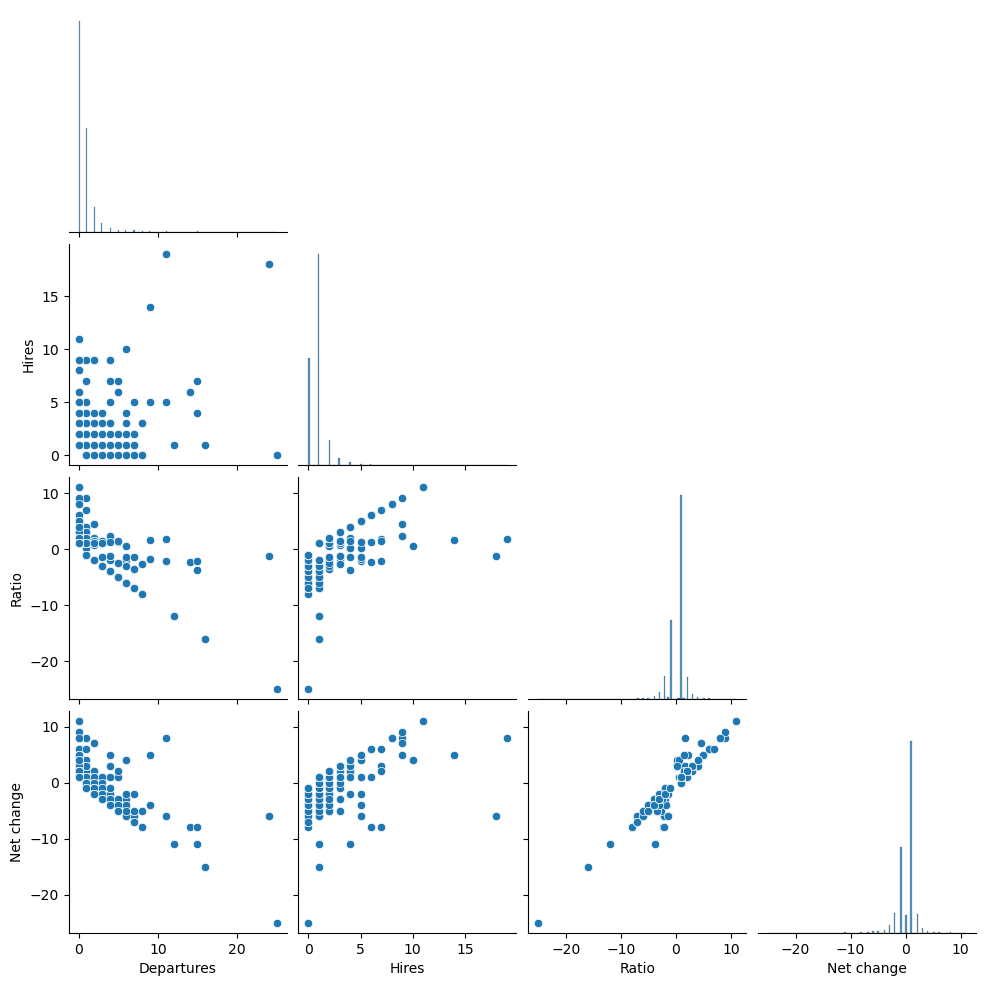

In [51]:
# Diagnostic Analytics: Correlation Analysis
sheet_name = 'Company Movements'
df = pd.read_excel(excel_file, sheet_name)

# List of columns to create histogram plots for Company movements sheet
company_movements_columns = ['Departures', 'Hires', 'Ratio', 'Net change']

# Create a pairplot
sns.pairplot(data=df[company_movements_columns], corner = True )
plt.show()
 

#### Diagonal Histograms: 
These show the distribution of values for each individual variable. For instance:

**'Departures' and 'Hires'** appear to have a right-skewed distribution, where most of the data is clustered around the lower values with some higher values extending to the right.

**'Ratio'** has a central peak with tails extending to both the left and right, indicating variability in whether companies have a net inflow or outflow of employees.

**'Net change'** also has a central peak with a spread that suggests variability in the net change of employees among companies.

### Visualizing Correlations with a Heatmap for the 'Company Movements' Sheet

The script performs a correlation analysis on the 'Company Movements' sheet, specifically examining the relationships between 'Hires', 'Departures', 'Ratio', and 'Net change'.

               Hires  Departures     Ratio  Net change
Hires       1.000000    0.165036  0.520430    0.519088
Departures  0.165036    1.000000 -0.713526   -0.757332
Ratio       0.520430   -0.713526  1.000000    0.962925
Net change  0.519088   -0.757332  0.962925    1.000000


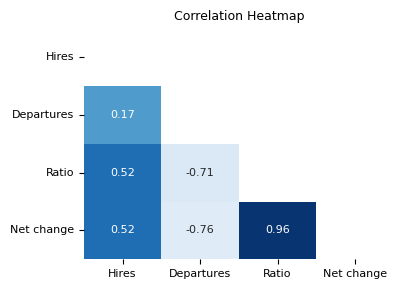

In [52]:
# Assuming excel_file is the ExcelFile object
sheet_name = 'Company Movements'
df = pd.read_excel(excel_file, sheet_name)

# Select relevant columns for correlation and heatmap
relevant_columns = ['Hires', 'Departures', 'Ratio', 'Net change']
correlation_matrix = df[relevant_columns].corr(method='pearson')
mask = np.triu(np.ones_like(correlation_matrix))
print(correlation_matrix)


# Loop through different colormaps and visualize the correlation matrix
#colormaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'coolwarm', 'Blues', 'Reds', 'Greens', 'BuPu', 'YlGnBu', 'Oranges', 'Purples']
#for cmap in colormaps:
    #sns.heatmap(correlation_matrix, annot=True, cmap=cmap, vmin=-1, vmax=1)
     #plt.title(f'Correlation Heatmap ({cmap} colormap)')
    #plt.show()
    
# Set the size of the figure 
plt.figure(figsize=(4,3))       
    
# Create a heatmap
heatmap=sns.heatmap(correlation_matrix, annot=True, cmap='Blues',mask=mask, cbar=None, vmin=-1, vmax=1, annot_kws={"size": 8})


plt.title('Correlation Heatmap',fontsize=9)
# Adjust the font size of x-axis (column names) and y-axis (row names)
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=8)
plt.show()

### Analyzing the result

The matrix appears to be a correlation matrix for the variables 'Hires', 'Departures', 'Ratio', and 'Net change'. Here's a breakdown of what these correlations mean:

**Hires and Departures (0.165036):** This positive, but relatively low, correlation suggests there is a slight relationship between the number of hires and departures. This could indicate that companies with more hires also have more departures, but the relationship is not strong.

**Hires and Ratio (0.520430):** There is a moderate positive correlation between hires and the ratio of hires to departures. This suggests that as the number of hires increases, the ratio tends to be higher, which could indicate a net inflow of talent.

**Hires and Net Change (0.519088):** This moderate positive correlation implies that an increase in hires is generally associated with an increase in net change, meaning companies hiring more people tend to have a positive net employee growth.

**Departures and Ratio (-0.713526):** This strong negative correlation indicates that higher departures are associated with a lower ratio, which would be expected since a higher number of departures compared to hires would decrease the ratio.

**Departures and Net Change (-0.757332):** This strong negative correlation suggests that an increase in departures is likely to lead to a more negative net change in employees, indicating a net loss of employees.

**Ratio and Net Change (0.962925):** The very strong positive correlation indicates that the ratio of hires to departures is highly indicative of the overall net change in employees. A high ratio, which indicates more hires relative to departures, is closely associated with a positive net change, and vice versa.




### Talent flow Analysis to/from other consulting companies

<Figure size 1200x400 with 0 Axes>

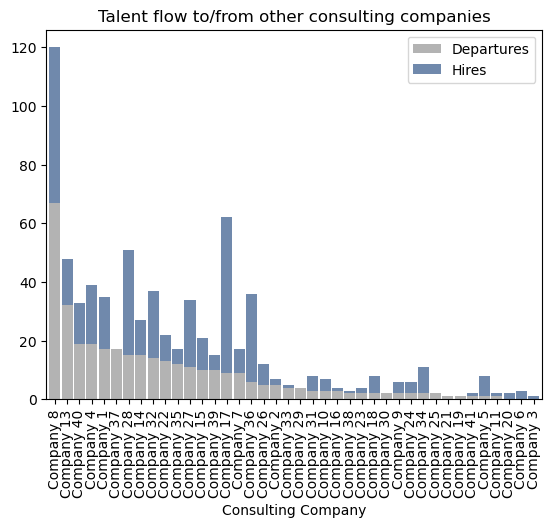

In [55]:
target_sheet = 'Company Movements'
company_movements_columns = ['Company_Name', 'Departures', 'Hires']


# Check if the target sheet exists in the Excel file
if target_sheet in excel_file.sheet_names:
    # Load the DataFrame for the target sheet
    df = excel_file.parse(target_sheet)

    # Filter rows where 'Consultant Company' is 1
    df_filtered_Consultant = df[df['Consultant Company'] == 1]

    # Filter columns of interest
    df_filtered_subset = df_filtered_Consultant[company_movements_columns]

    # Group by Company_Name and sum the Departures and Hires
    df_grouped = df_filtered_subset.groupby('Company_Name').sum()

    # Set colors for 'Departures' and 'Hires'
    colors = ['#B3B3B3', '#7089AC']
    
    # Set the size of the figure (adjust the width and height as needed)
    plt.figure(figsize=(12, 4))
    
    # Sort the DataFrame by 'Departures' in descending order
    df_grouped_sorted = df_grouped.sort_values(by='Departures', ascending=False)

    
    # Specify the bar width
    bar_width = 0.9  
    
    
    # Create a grouped bar chart
    ax=df_grouped_sorted.plot(kind='bar', stacked=True, color=colors, width=bar_width,)
    
    plt.title('Talent flow to/from other consulting companies')
    plt.xlabel('Consulting Company')
  
    plt.show()
else:
    print(f"Sheet '{target_sheet}' not found in the Excel file.")

The chart primarily illustrates the flow of talent among consulting companies. The length of each bar segment shows how many employees were lost to (gray segment) or gained from (blue segment) other consulting companies.

The company labeled 'Company 8' on the x-axis exhibits the most significant talent loss to other consulting firms, as indicated by the tallest gray segment

### Talent Flow to/from other automotive companies 

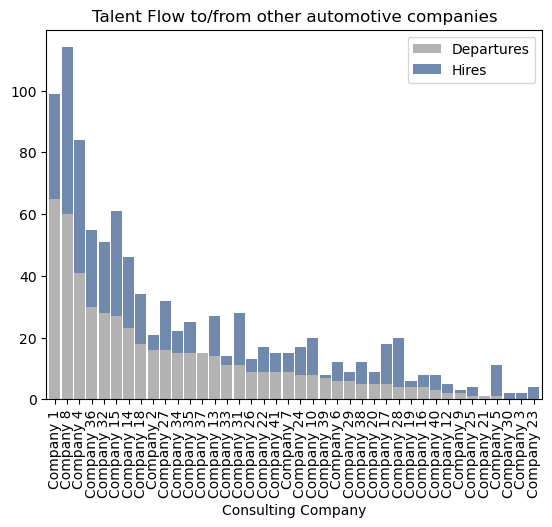

In [56]:
# Filter rows where 'Automotive Company' is 1
df_filtered_automotive = df[df['Automotive Company'] == 1]

# Filter columns of interest
df_filtered_subset2 = df_filtered_automotive[company_movements_columns]

# Group by Company_Name and sum the Departures and Hires
df_automotive = df_filtered_subset2.groupby('Company_Name').sum()

# Sort the DataFrame by 'Departures' in descending order
df_automotive_sorted = df_automotive.sort_values(by='Departures', ascending=False)

# Create a grouped bar chart
ax_automotive=df_automotive_sorted.plot(kind='bar', stacked=True, color=colors, width=bar_width)
    
plt.title('Talent Flow to/from other automotive companies')
plt.xlabel('Consulting Company')
  
plt.show()


### Ratio of Hires from versus Departures to other Consulting Companies

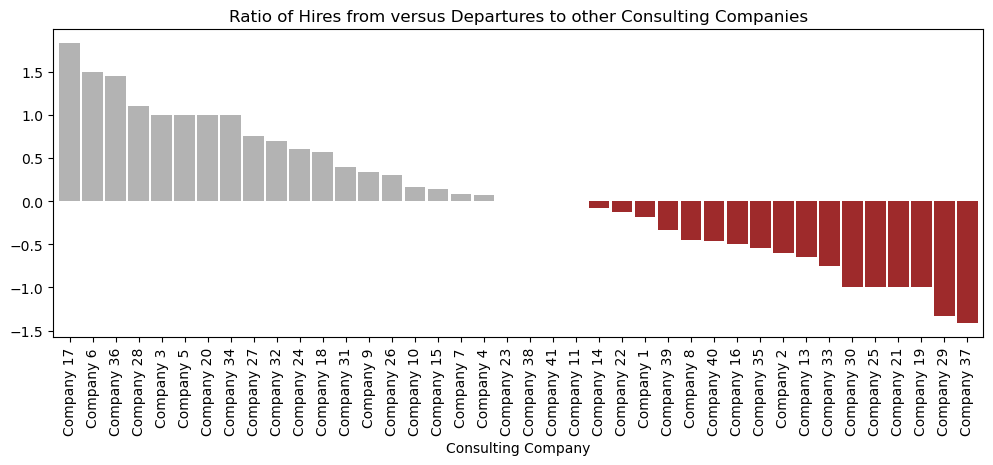

In [57]:
# Check if the target sheet exists in the Excel file
if target_sheet in excel_file.sheet_names:
    
    # Load the DataFrame for the target sheet
    df = excel_file.parse(target_sheet)

    # Group by Company_Name and calculate the mean of 'Ratio'
    df_ratio_grouped = df_filtered_Consultant.groupby('Company_Name')['Ratio'].mean()

    
    # Set the size of the figure 
    plt.figure(figsize=(12,4))
    
    # Sort the DataFrame by  descending order
    df_ratio_grouped_sorted = df_ratio_grouped.sort_values(ascending=False)
    
    # Set the colors for 'Ratio'
    colors = df_ratio_grouped_sorted.apply(lambda x: '#9E2A2B' if x < 0 else '#B3B3B3')

    # Specify the bar width
    bar_width = 0.9  
    
    # Create a grouped bar chart
    ax1 = df_ratio_grouped_sorted.plot(kind='bar', color=colors, width=bar_width)
    
    plt.title('Ratio of Hires from versus Departures to other Consulting Companies')
    plt.xlabel('Consulting Company')
  
    plt.show()
else:
    print(f"Sheet '{target_sheet}' not found in the Excel file.")


### Ratio of Hires from versus Departures to Automotive Companies

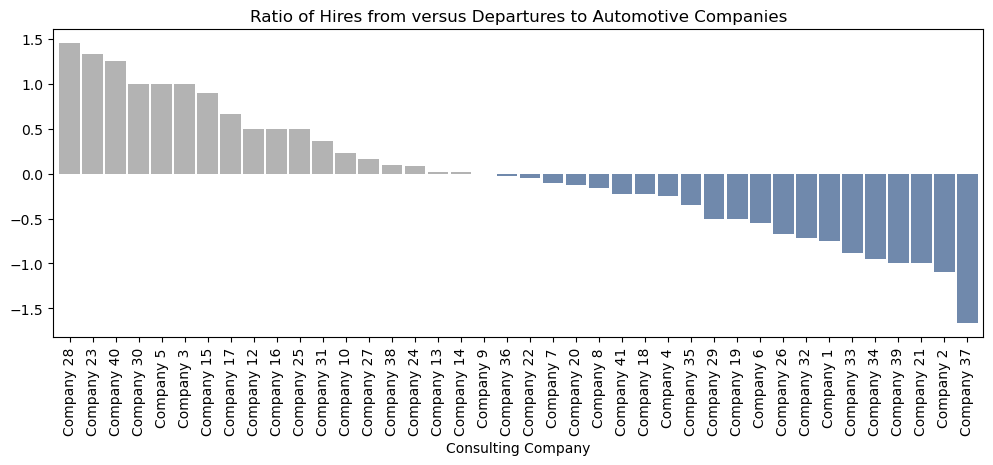

In [58]:
    # Group by Company_Name and calculate the mean of 'Ratio'
df_ratio2_grouped = df_filtered_automotive.groupby('Company_Name')['Ratio'].mean()

    
    # Set the size of the figure 
plt.figure(figsize=(12,4))
    
    # Sort the DataFrame by  descending order
df_ratio2_grouped_sorted = df_ratio2_grouped.sort_values(ascending=False)
    
    # Set the colors for 'Ratio'
colors = df_ratio2_grouped_sorted.apply(lambda x: '#7089AC' if x < 0 else '#B3B3B3')

    # Specify the bar width
bar_width = 0.9  
    
    # Create a grouped bar chart
ax2 = df_ratio2_grouped_sorted.plot(kind='bar', color=colors, width=bar_width)
    
plt.title('Ratio of Hires from versus Departures to Automotive Companies')
plt.xlabel('Consulting Company')
  
plt.show()


### Summary of Total Talent Flow Across the 'Company Movements' Sheet

In [59]:
# Calculating and Displaying Summary Statistics for Talent Flow

df_summary = df.agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
    
})

# Format 'Ratio' column to display values with 2 decimal places
df_summary['Ratio'] = df_summary['Ratio'].round(2)

print('Summary of total talent Flow')
print('-' * 60)
print(df_summary)

Summary of total talent Flow
------------------------------------------------------------
Departures    1649.00
Hires         2154.00
Net change     505.00
Ratio            0.26
dtype: float64


 Such a summary is crucial for strategic decision-making, as it reflects the company-wide trends in talent acquisition and loss, potentially guiding HR strategies and business planning.

 ## Summary of Talent Flow for Each Consulting Company

This code creates a summary of talent movement metrics ('Departures', 'Hires', 'Net change', 'Ratio') for each consulting company, sorts the data by 'Departures', and formats the 'Ratio' for clear presentation.

In [60]:
df_summary1 = df.groupby('Company_Name').agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
})

# Sort the DataFrame by 'Departures' in descending order
df_summary1_sorted = df_summary1.sort_values(by='Departures', ascending=False)

# Format 'Ratio' column to display values with 2 decimal places
df_summary1_sorted['Ratio'] = df_summary1_sorted['Ratio'].round(2)

print('Summary of talent Flow for each consulting companies')
print('-' * 60)
print(df_summary1_sorted)

Summary of talent Flow for each consulting companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 8            221    225           4   0.21
Company 4            145    135         -10  -0.09
Company 1            120    140          20   0.23
Company 13           104     79         -25  -0.19
Company 37            95      4         -91  -1.40
Company 36            84    125          41   0.49
Company 35            81     74          -7  -0.04
Company 32            61    116          55   0.63
Company 14            57     85          28   0.33
Company 22            56     66          10   0.19
Company 15            49    132          83   0.94
Company 27            47    104          57   0.62
Company 7             46     38          -8  -0.01
Company 28            46    121          75   0.88
Company 40            42    110          68   0.72
Company 39         

### Summarized Talent Flow Metrics by Consulting Company

The script compiles and sorts aggregate talent flow statistics for each consulting company present in the 'Company Movements' sheet.

#### Steps for Generating Company-Wise Summary:

1. **Group and Aggregate**:
   - The data is grouped by 'Company_Name'.
   - Summations are performed for 'Departures', 'Hires', and 'Net change' to get total figures.
   - The mean for 'Ratio' is calculated to understand the average relationship between hires and departures.

2. **Sorting the Summary**:
   - The resulting summary DataFrame is sorted by 'Departures' in descending order to highlight companies with the largest talent loss first.

3. **Formatting for Clarity**:
   - The 'Ratio' values are formatted to show only two decimal places, ensuring the data is easy to read and interpret.

4. **Printing the Summary**:
   - A clear title 'Summary of talent Flow for each consulting companies' is printed to describe the content.
   - A separator line is included for visual distinction between the title and the summary data.
   - The sorted summary DataFrame is printed, displaying the talent flow metrics for each company.

#### Purpose of the Summary:
- By highlighting the total 'Departures' and 'Hires' alongside the net change in headcount and the average ratio of hires to departures, the summary captures key aspects of each company's talent movement.
- The structured presentation of this data is essential for strategic HR considerations, informing potential retention challenges or talent acquisition opportunities.


## Aggregated Talent Flow Between Consultant Companies

The script processes data to provide a concise summary of the overall talent movement between consultant companies.


In [61]:
df_summary_consultant =  df_filtered_Consultant.agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
    
})

# Format 'Ratio' column to display values with 2 decimal places
df_summary_consultant['Ratio'] = df_summary_consultant['Ratio'].round(2)

print('Talent Flow between consultant companies')
print('-' * 60)
print(df_summary_consultant)

Talent Flow between consultant companies
------------------------------------------------------------
Departures    343.00
Hires         397.00
Net change     54.00
Ratio           0.22
dtype: float64


## Summary of Talent Flow to/from Other Consulting Companies for Each Consulting Company

In [62]:
#Summary of Talent Flow to/from other consulting companies'

df_summary_consultant1 = df_filtered_Consultant.groupby('Company_Name').agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
})

# Format 'Ratio' column to display values with 2 decimal places
df_summary_consultant1['Ratio'] = df_summary_consultant1['Ratio'].round(2)

df_summary_consultant1_sorted = df_summary_consultant1.sort_values(by='Departures', ascending=False)

print('Summary of talent Flow to/from other consulting companies')
print('-' * 60)
print(df_summary_consultant1_sorted)

Summary of talent Flow to/from other consulting companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 8             67     53         -14  -0.45
Company 13            32     16         -16  -0.65
Company 40            19     14          -5  -0.46
Company 4             19     20           1   0.07
Company 1             17     18           1  -0.18
Company 37            17      0         -17  -1.42
Company 28            15     36          21   1.11
Company 14            15     12          -3  -0.08
Company 32            14     23           9   0.69
Company 22            13      9          -4  -0.12
Company 35            12      5          -7  -0.55
Company 27            11     23          12   0.75
Company 15            10     11           1   0.14
Company 39            10      5          -5  -0.33
Company 17             9     53          44   1.83
Company 7     

### Summary of Talent Flow to/from Other Consulting Companies

The script calculates and displays a comprehensive summary of talent movement metrics, grouped by each consulting company.

#### Summary Generation Procedure:

1. **Group and Compute**:
   - The data is grouped by 'Company_Name'.
   - Aggregate functions are applied to sum 'Departures' and 'Hires', sum 'Net change', and calculate the mean 'Ratio'.

2. **Formatting and Sorting**:
   - The 'Ratio' is formatted to two decimal places to maintain consistency and readability.
   - The DataFrame is then sorted by 'Departures' in descending order to highlight companies with the highest talent loss.

3. **Displaying the Summary**:
   - The title 'Summary of talent Flow to/from other consulting companies' is printed to clearly indicate the content.
   - A separator line is included for visual clarity.
   - The sorted summary statistics are printed, presenting a clear picture of the talent flow for each consulting company.

#### Purpose of the Summary:

- This summary provides an in-depth look at how talent is moving between consulting firms, identifying which companies are net gainers or losers of talent.
- The total 'Departures' and 'Hires' give an idea of the volume of talent exchange, while the 'Net change' and 'Ratio' offer insight into the overall trend of talent movement within the consulting sector.
- The formatted and sorted summary is crucial for strategic HR analysis, enabling stakeholders to quickly identify trends and make informed decisions regarding talent management.


## Top 10 Companies with the Highest Talent Flow to Consulting Firms

The script identifies and displays the top 10 companies with the most significant talent movement towards consulting firms.

In [63]:
print('Top 10 companies with the most talent flow to consulting companies')
print('-' * 60)
print(df_summary_consultant1_sorted.head(10))

Top 10 companies with the most talent flow to consulting companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 8             67     53         -14  -0.45
Company 13            32     16         -16  -0.65
Company 40            19     14          -5  -0.46
Company 4             19     20           1   0.07
Company 1             17     18           1  -0.18
Company 37            17      0         -17  -1.42
Company 28            15     36          21   1.11
Company 14            15     12          -3  -0.08
Company 32            14     23           9   0.69
Company 22            13      9          -4  -0.12


## Top 10 Companies with the Highest Inflow of Talent from Consulting Firms

The script ranks consulting companies based on the volume of talent they have acquired from other consulting firms and presents the top performers.


In [64]:
df_summary_consultant2_sorted = df_summary_consultant1.sort_values(by='Hires', ascending=False)

print('Top 10 companies with the most talent flow from consulting companies')
print('-' * 60)
print(df_summary_consultant2_sorted.head(10))

Top 10 companies with the most talent flow from consulting companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 17             9     53          44   1.83
Company 8             67     53         -14  -0.45
Company 28            15     36          21   1.11
Company 36             6     30          24   1.44
Company 32            14     23           9   0.69
Company 27            11     23          12   0.75
Company 4             19     20           1   0.07
Company 1             17     18           1  -0.18
Company 13            32     16         -16  -0.65
Company 40            19     14          -5  -0.46


#### Purpose of the Top 10 List:

- This list provides valuable insights into the consulting companies that are most successful in attracting talent, potentially indicating a strong employer brand or growth phase.
- The summary can inform competitive analysis, allowing consulting firms to benchmark their talent acquisition performance against industry peers.
- Understanding these dynamics is critical for consulting firms aiming to enhance their talent acquisition strategies and bolster their workforce.

## Aggregated Talent Flow  to Automotive Companies

This code snippet calculates the sum of 'Departures' and 'Hires', the sum of 'Net change', and the mean of 'Ratio' to provide an overview of the talent flow to automotive companies from the consulting sector.

In [65]:
df_summary_automotive =  df_filtered_automotive.agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
    
})

# Format 'Ratio' column to display values with 2 decimal places
df_summary_automotive['Ratio'] = df_summary_automotive['Ratio'].round(2)

print('Talent Flow to automotive companies')
print('-' * 60)
print(df_summary_automotive)

Talent Flow to automotive companies
------------------------------------------------------------
Departures    513.0
Hires         454.0
Net change    -59.0
Ratio          -0.1
dtype: float64


### Summary of Talent Movement to Automotive Companies

The script compiles key statistics to understand the aggregate talent flow from consulting firms to the automotive sector.

#### Compilation Procedure:

1. **Aggregate Calculations**:
   - Totals for 'Departures' and 'Hires' are calculated to quantify the talent movement.
   - 'Net change' is summed to determine the overall headcount impact.
   - The 'Ratio' is averaged to understand the typical balance of hires to departures.

2. **Formatting the 'Ratio'**:
   - The 'Ratio' is rounded to two decimal places for precision and ease of interpretation.

3. **Presenting the Summary**:
   - The title 'Talent Flow to automotive companies' is displayed to indicate the focus of the summary.
   - A visual separator line is used to distinguish the heading from the data.
   - The aggregated statistics are printed, providing a snapshot of the talent flow to automotive companies.

#### Purpose of the Summary:

- This summary captures the essence of talent dynamics between consulting firms and the automotive sector, indicating the volume of talent exchange.
- The figures serve as indicators of market trends, potentially signaling the consulting sector's attractiveness to automotive professionals.
- The average 'Ratio' offers insight into whether there's generally a net inflow or outflow of talent to the automotive industry from these companies.


## Summary of Talent Flow to/from Automotive Companies for Each Consulting Company

In [66]:
# Summary of Talent Movement to Automotive Companies for each 'Company_Name'

df_summary_automotive1 = df_filtered_automotive.groupby('Company_Name').agg({
    'Departures': 'sum',
    'Hires': 'sum',
    'Net change': 'sum',
    'Ratio': 'mean',
})

df_summary_automotive1['Ratio'] = df_summary_automotive1['Ratio'].round(2)

# Sort the DataFrame by 'Departures' in descending order
df_summary_automotive1_sorted = df_summary_automotive1.sort_values(by='Departures', ascending=False)

print('Summary of talent flow to/from other automotive companies')
print('-' * 60)
print(df_summary_automotive1_sorted)

Summary of talent flow to/from other automotive companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 1             65     34         -31  -0.75
Company 8             60     54          -6  -0.16
Company 4             41     43           2  -0.25
Company 36            30     25          -5  -0.02
Company 32            28     23          -5  -0.72
Company 15            27     34           7   0.90
Company 14            23     23           0   0.01
Company 18            18     16          -2  -0.23
Company 2             16      5         -11  -1.09
Company 27            16     16           0   0.17
Company 34            15      7          -8  -0.95
Company 35            15     10          -5  -0.35
Company 37            15      0         -15  -1.67
Company 13            14     13          -1   0.02
Company 33            11      3          -8  -0.89
Company 31    

##  Top 10 Companies with the Highest Talent Flow to Automotive Companies

This report identifies the top 10 consulting firms experiencing the most significant talent flow to automotive companies, a crucial insight for understanding talent mobility within the industry.

In [67]:
print('Top 10 companies with the most talent flow to automotive companies')
print('-' * 60)

print(df_summary_automotive1_sorted.head(10))

Top 10 companies with the most talent flow to automotive companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 1             65     34         -31  -0.75
Company 8             60     54          -6  -0.16
Company 4             41     43           2  -0.25
Company 36            30     25          -5  -0.02
Company 32            28     23          -5  -0.72
Company 15            27     34           7   0.90
Company 14            23     23           0   0.01
Company 18            18     16          -2  -0.23
Company 2             16      5         -11  -1.09
Company 27            16     16           0   0.17


 ## Top 10 Companies with the Greatest Inflow of Talent from Automotive Companies

The following list highlights the top 10 companies with the highest number of hires from the automotive industry, indicating  inflow of talent to these firms.

In [68]:
# Sort the DataFrame by 'Departures' in descending order
df_summary_automotive_sorted2 = df_summary_automotive1.sort_values(by='Hires', ascending=False)

print('Top 10 companies with the most talent flow from automotive companies')
print('-' * 60)

print(df_summary_automotive_sorted2.head(10))

Top 10 companies with the most talent flow from automotive companies
------------------------------------------------------------
              Departures  Hires  Net change  Ratio
Company_Name                                      
Company 8             60     54          -6  -0.16
Company 4             41     43           2  -0.25
Company 1             65     34         -31  -0.75
Company 15            27     34           7   0.90
Company 36            30     25          -5  -0.02
Company 14            23     23           0   0.01
Company 32            28     23          -5  -0.72
Company 31            11     17           6   0.37
Company 28             4     16          12   1.45
Company 27            16     16           0   0.17


# Statistical Analysis:T-Test

Hypothesis / Assumption: Most companies replace departures with new hires, so small differences during any time period are part of a normal turnover and thus not meaningful, but when differences are large, it can be an indicator of a company's ability to attract and retain talent. We identifying the companies for which either departures or hires are real using tests of statistical significance. 

H0(null hypothesis): There is no evidence that there is a real (statistically significant) difference between departures and new hires.(Departures = Hires)

H1(alternative hypothesis): There is evidence that there is a real difference between departures and new hires (Departures =! Hires)

In [69]:
#Statistical Comparison of Departures and Hires in Consulting Companies

sheet_name = 'Company Movements'

# Read the data into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)

# Get unique company names
unique_companies = df['Company_Name'].unique()

# Create a new column
df['Good Consultant2'] = ''

# Iterate over unique companies
for company in unique_companies:
    # Extract data for the current company
    company_data = df[df['Company_Name'] == company]
    departures = company_data['Departures']
    hires = company_data['Hires']
    
        # Not normal, dependent, but equal variances, use Mann-Whitney U Test
    stat, pvalue = ttest_ind(departures, hires)
    result = 'Departures =! Hires' if pvalue < 0.025 else 'Departures = Hires'
        

    # Update the 'Good Consultant' column
    df.loc[df['Company_Name'] == company, 'Good Consultant2'] = result

# Display the DataFrame with the new column
print(df[['Company_Name', 'Good Consultant2']])



     Company_Name     Good Consultant2
0       Company 1   Departures = Hires
1       Company 1   Departures = Hires
2       Company 1   Departures = Hires
3       Company 1   Departures = Hires
4       Company 1   Departures = Hires
...           ...                  ...
2325    Company 9  Departures =! Hires
2326    Company 9  Departures =! Hires
2327    Company 9  Departures =! Hires
2328    Company 9  Departures =! Hires
2329    Company 9  Departures =! Hires

[2330 rows x 2 columns]


C:\Zohreh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


The script applies a T-test to each company's talent flow data to determine if there's a significant difference between the number of departures and hires.

#### Analysis Workflow:

1. **Data Preparation**:
   - The 'Company Movements' sheet is read into a DataFrame.
   - Unique company names are extracted for analysis.

2. **Column Initialization**:
   - A new column, 'Good Consultant2', is added to the DataFrame to store the results of the statistical test.

3. **Iterative T-Test**:
   - For each company, the script extracts the data on departures and hires.
   - A T-test (`ttest_ind`) is performed to compare these two datasets.
   - The p-value is used to determine if there's a significant difference between departures and hires (with a significance level of 2.5%).

4. **Result Assignment**:
   - Based on the p-value, the 'Good Consultant2' column is updated with either 'Departures =! Hires' (indicating a significant difference) or 'Departures = Hires' (no significant difference).

5. **Output Display**:
   - The DataFrame, with the new column showing the test results for each company, is printed.

#### Purpose of the Analysis:

- This method provides insights into whether consulting firms have a balanced talent flow (similar numbers of departures and hires) or if there are significant disparities.
- The statistical approach ensures that observed differences are not due to random chance, adding rigor to the analysis.
- Such insights can inform strategic decisions in talent management, helping companies understand if they are losing more talent than they are gaining or vice versa.

## Exporting DataFrame with T-Test Results to Excel

In [70]:
# Save the DataFrame to Excel
df.to_excel('C:/Users/zkarimib@volvocars.com/OneDrive - Volvo Cars/Zohreh/Github/Datasets/All Consultant Companies/out/statistical Methods.xlsx', index=False)

In [71]:
sheet_name = 'Locations'

# Read the data into a DataFrame
df = pd.read_excel(excel_file, sheet_name=sheet_name)
print(df.head())

                            Location  Employees  1y hires  Job posts  \
0         Askersund, Orebro , Sweden          1         1          0   
1         Borlänge, Dalarna , Sweden          1         1          0   
2    Borås, Vastra Gotaland , Sweden          2         0          0   
3  Eskilstuna, Sodermanland , Sweden          1         0          0   
4            Falun, Dalarna , Sweden          1         1          0   

   N Last Year Employee    Your %  1 Year Growth  % of employees Company_Name  \
0                   0.0  0.000000            NaN        0.001282    Company 1   
1                   1.0  0.000000            0.0        0.001282    Company 1   
2                   2.0  0.005062            0.0        0.002564    Company 1   
3                   2.0  0.000000           -0.5        0.001282    Company 1   
4                   0.0  0.000000            NaN        0.001282    Company 1   

   1y growth        City             County Country  
0        NaN   Askersund  